## plot the result to inspect

In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import geopandas as gpd
import pandas as pd
import plotly.express as px
import json
import numpy as np
import os
from shapely.geometry import Point
from shapely import wkt
# Process the 'reeds_ba_list' column to expand the sets into individual rows, keeping 'state' intact
from ast import literal_eval
# Get the current directory where your script is running
current_directory = os.getcwd()

# Construct the path to your resources folder dynamically
resources_path = os.path.join(current_directory, 'resources')

# Now, build the full path to your CSV files
polygons_csv_path = os.path.join(resources_path, 'US_CAN_MEX_PCA_polygons.csv')
state_to_ba_csv_path = os.path.join(resources_path, 'state_to_ba_mapping.csv')
# Finally, use pandas to read the CSV files
polygons_df = pd.read_csv(polygons_csv_path)
state_to_ba_df = pd.read_csv(state_to_ba_csv_path)
# Filter polygons
polygons_df = polygons_df[polygons_df['rb'].isin([f'p{i}' for i in range(1, 135)])]

# Since the instructions for processing the state mapping are a bit unclear,
# Convert the string representation of sets in 'reeds_ba_list' to actual sets
state_to_ba_df['reeds_ba_list'] = state_to_ba_df['reeds_ba_list'].apply(literal_eval)

# Explode the sets into separate rows
exploded_df = state_to_ba_df.explode('reeds_ba_list')[['state','reeds_ba_list']]
polygons_df_filtered = polygons_df[polygons_df['rb'].isin([f'p{i}' for i in range(1, 135)])]
polygons_gdf = gpd.GeoDataFrame(polygons_df_filtered, geometry=gpd.GeoSeries.from_wkt(polygons_df_filtered['WKT']))

# Step 2: Merge exploded_df with polygons_gdf on the 'reeds_ba_list' and 'rb' columns
merged_gdf = polygons_gdf.merge(exploded_df, left_on='rb', right_on='reeds_ba_list')
merged_gdf['country']='USA'
merged_gdf=merged_gdf[['rb','state','country','geometry']]

# Country - Group by 'country' and dissolve to merge geometries
gdf_country = merged_gdf.dissolve(by='country').reset_index()

# State - Group by 'state' and dissolve to merge geometries
gdf_state = merged_gdf.dissolve(by='state').reset_index()

# Subregion (rb) - No need to group since each 'rb' is already unique
gdf_subregion = merged_gdf[['rb', 'geometry']].drop_duplicates()


# Convert each GeoDataFrame to GeoJSON for use in Plotly
geojson_country = json.loads(gdf_country.to_json())
geojson_state = json.loads(gdf_state.to_json())
geojson_subregion = json.loads(gdf_subregion.to_json())
import json
current_directory= os.path.join(current_directory, 'web_page_data')
# Define file paths for saving
geojson_country_path = os.path.join(current_directory, 'geojson_country.json')
geojson_state_path = os.path.join(current_directory, 'geojson_state.json')
geojson_subregion_path = os.path.join(current_directory, 'geojson_subregion.json')
# Define file paths for saving
gdf_country_path = os.path.join(current_directory, 'gdf_country.gpkg')
gdf_state_path = os.path.join(current_directory, 'gdf_state.gpkg')
gdf_subregion_path = os.path.join(current_directory, 'gdf_subregion.gpkg')

# Save the GeoDataFrames
gdf_country.to_file(gdf_country_path, driver='GPKG')
gdf_state.to_file(gdf_state_path, driver='GPKG')
gdf_subregion.to_file(gdf_subregion_path, driver='GPKG')

# Function to save GeoJSON to a file
def save_geojson(data, file_path):
    with open(file_path, 'w') as f:
        json.dump(data, f)

# Save the GeoJSON data
save_geojson(geojson_country, geojson_country_path)
save_geojson(geojson_state, geojson_state_path)
save_geojson(geojson_subregion, geojson_subregion_path)


In [ ]:
# Function to read GeoJSON from a file
def read_geojson(file_path):
    with open(file_path) as f:
        return json.load(f)

# Read the GeoJSON data
geojson_country_read = read_geojson(geojson_country_path)
geojson_state_read = read_geojson(geojson_state_path)
geojson_subregion_read = read_geojson(geojson_subregion_path)


In [ ]:
print(geojson_country == geojson_country_read)
print(geojson_state == geojson_state_read)
print(geojson_subregion == geojson_subregion_read)


In [ ]:
# Read the GeoDataFrames
gdf_country_read = gpd.read_file(gdf_country_path)
gdf_state_read = gpd.read_file(gdf_state_path)
gdf_subregion_read = gpd.read_file(gdf_subregion_path)


In [ ]:
print(gdf_country.shape == gdf_country_read.shape)
print(gdf_state.shape == gdf_state_read.shape)
print(gdf_subregion.shape == gdf_subregion_read.shape)

# Sample a row and compare geometries (example using 'gdf_country')
print(gdf_country.geometry.iloc[0].equals(gdf_country_read.geometry.iloc[0]))


In [3]:
# Assuming you have a GeoJSON file and a corresponding GeoDataFrame
import geopandas as gpd
import json
import os
current_directory = os.getcwd()
data_path = os.path.join(current_directory, 'web_page_data')

geojson_country_path = os.path.join(data_path, 'geojson_country.json')
geojson_state_path = os.path.join(data_path, 'geojson_state.json')
geojson_subregion_path = os.path.join(data_path, 'geojson_subregion.json')

# Define file paths for saving
gdf_country_path = os.path.join(data_path, 'gdf_country.gpkg')
gdf_state_path = os.path.join(data_path, 'gdf_state.gpkg')
gdf_subregion_path = os.path.join(data_path, 'gdf_subregion.gpkg')

# Load GeoJSON
with open(geojson_country_path) as f:
    geojson_country = json.load(f)
with open(geojson_state_path) as f:
    geojson_state = json.load(f)
with open(geojson_subregion_path) as f:
    geojson_subregion = json.load(f)

# Check the first GeoJSON feature properties
print("GeoJSON feature example:", geojson_subregion['features'][0]['properties'])

# Load GeoDataFrame and check its first row
gdf_subregion = gpd.read_file(gdf_subregion_path)
print("GeoDataFrame example:", gdf_subregion.iloc[0])

# Ensure the 'locations' parameter in Plotly Express matches these identifiers


GeoJSON feature example: {'rb': 'p1'}
GeoDataFrame example: rb                                                         p1
geometry    MULTIPOLYGON (((-122.960715524824 47.144493305...
Name: 0, dtype: object


create monthly base base line chart data

In [70]:

import pandas as pd
import os
from datetime import datetime

# Define the directory where the CSV files are located
directory = '/Volumes/T7/prediction/rcp85cooler'

# Create a list of all 'rb' codes and years
rb_codes = [f'p{i}' for i in range(1, 135)]



# Function to read and process files for a given rb code
def process_rb_files(rb_code):
    rb_df_list = []
    # Loop through all years for the given rb_code
    for year in years:
        # Construct file name
        folder_path = os.path.join(directory, str(year))
        file_name = f"{rb_code}_{year}_mlp_output.csv"
        file_path = os.path.join(folder_path, file_name)
        # Check if file exists to avoid FileNotFoundError
        if os.path.isfile(file_path):
            # Read the CSV file
            temp_df = pd.read_csv(file_path)
            temp_df=temp_df[['Time_UTC','Load']]
            # Convert 'Time_UTC' to datetime and extract 'Year' and 'Month'
            temp_df['Time_UTC'] = pd.to_datetime(temp_df['Time_UTC'])
            temp_df['Year'] = temp_df['Time_UTC'].dt.year
            temp_df['Month'] = temp_df['Time_UTC'].dt.month
            # Aggregate Load by 'Year' and 'Month'
            aggregated_df = temp_df.groupby(['Year', 'Month'])['Load'].sum().reset_index()
            # Add the aggregated data to the list
            rb_df_list.append(aggregated_df)
    
    # Vertically concatenate all yearly data for the rb code
    concatenated_df = pd.concat(rb_df_list, ignore_index=True)
    return concatenated_df

years = list(range(2020, 2100))
months = list(range(1, 13))

# Create a DataFrame with all combinations of 'Year' and 'Month'
year_month_df = pd.DataFrame([(y, m) for y in years for m in months], columns=['Year', 'Month'])

# Placeholder to simulate merging data for multiple rb codes
final_df = year_month_df.copy()
for rb_code in rb_codes: 
    rb_df = process_rb_files(rb_code)
    final_df = final_df.merge(rb_df, on=['Year', 'Month'], how='left').rename(columns={'Load': rb_code})
# Placeholder function to read 'state_to_ba_mapping.csv' and perform aggregation
def string_to_set(string):
    # Remove curly braces and split the string
    elements = string.replace('{', '').replace('}', '').split(',')
    # Remove any extra whitespace and single quotes from each element
    elements = [e.strip().replace("'", "") for e in elements]
    return set(elements)
def aggregate_state_data(final_df):
    # Placeholder to simulate reading the 'state_to_ba_mapping.csv' file
    # In practice, this should read the actual file
    state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')

    # Add columns for each state by summing the relevant rb columns based on the mapping
    for index, row in state_to_ba_mapping.iterrows():
        rb_list = string_to_set(row['reeds_ba_list'])
        state_column = row['state']
        # Sum the columns specified in reeds_ba_list for each state
        final_df[state_column] = final_df[list(rb_list)].sum(axis=1)

    # Calculate the total for the USA by summing all state columns
    state_columns = state_to_ba_mapping['state'].values
    final_df['USA'] = final_df[state_columns].sum(axis=1)

    return final_df

# Apply the placeholder aggregation function to the simulated final_df
final_aggregated_df = aggregate_state_data(final_df)

def aggregate_state_data(final_df):
    # Placeholder to simulate reading the 'state_to_ba_mapping.csv' file
    # In practice, this should read the actual file
    state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')

    # Add columns for each state by summing the relevant rb columns based on the mapping
    for index, row in state_to_ba_mapping.iterrows():
        rb_list = string_to_set(row['reeds_ba_list'])
        state_column = row['state']
        # Sum the columns specified in reeds_ba_list for each state
        final_df[state_column] = final_df[list(rb_list)].sum(axis=1)

    # Calculate the total for the USA by summing all state columns
    state_columns = state_to_ba_mapping['state'].values
    final_df['USA'] = final_df[state_columns].sum(axis=1)

    return final_df

# Apply the placeholder aggregation function to the simulated final_df
final_aggregated_df = aggregate_state_data(final_df)
final_aggregated_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/mock_rcp85cooler.csv')

max monthlly data

In [71]:

import pandas as pd
import os
from datetime import datetime
import numpy as np
# Placeholder function to read 'state_to_ba_mapping.csv' and perform aggregation
def string_to_set(string):
    # Remove curly braces and split the string
    elements = string.replace('{', '').replace('}', '').split(',')
    # Remove any extra whitespace and single quotes from each element
    elements = [e.strip().replace("'", "") for e in elements]
    return set(elements)
# Define the directory where the CSV files are located
directory = '/Volumes/T7/prediction/rcp85cooler'

# Create a list of all 'rb' codes and years
rb_codes = [f'p{i}' for i in range(1, 135)]
years = list(range(2020, 2100))
months = list(range(1, 13))


def process_rb_files_daily(rb_code, years):
    rb_df_list = []
    for year in years:
        folder_path = os.path.join(directory, str(year))
        file_name = f"{rb_code}_{year}_mlp_output.csv"
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            temp_df = pd.read_csv(file_path)[['Time_UTC', 'Load']]
            temp_df['Time_UTC'] = pd.to_datetime(temp_df['Time_UTC'])
            rb_df_list.append(temp_df)
    concatenated_df = pd.concat(rb_df_list, ignore_index=True)
    return concatenated_df
def aggregate_state_and_usa_daily(final_rb_df):
    # Read the state to rb mapping
    state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')
    
    # For each state, sum the relevant 'rb' daily sums
    for index, row in state_to_ba_mapping.iterrows():
        rb_list = string_to_set(row['reeds_ba_list'])  # Convert string to list/set of rb codes
        state_column = row['state']
        # Ensure only existing columns are summed
        rb_columns = [rb for rb in rb_list if rb in final_rb_df.columns]
        # Summing for each state
        final_rb_df[state_column] = final_rb_df[rb_columns].sum(axis=1)
    
    # Summing all states to get USA total
    state_columns = state_to_ba_mapping['state'].tolist()
    final_rb_df['USA'] = final_rb_df[state_columns].sum(axis=1)
    
    return final_rb_df



final_dfs = []
for year in years:
    # Process data for the year (pseudo-code placeholders for actual processing)
    First=True
    for rb_code in rb_codes:
        temp_df = process_rb_files_daily(rb_code, [year])
        if First:
            processed_df=temp_df.copy()
            First=False
            processed_df[rb_code]=processed_df['Load']
            processed_df=processed_df.drop(['Load'], axis=1)
        else:
            # Assuming processed_df and temp_df are defined and have the appropriate columns
            processed_df = processed_df.merge(temp_df, on=['Time_UTC'], how='inner')
            processed_df[rb_code]=processed_df['Load']
            processed_df=processed_df.drop(['Load'], axis=1)
    processed_df = aggregate_state_and_usa_daily(processed_df)
    processed_df['Time_UTC'] = pd.to_datetime(processed_df['Time_UTC'])
    processed_df['Year'] = processed_df['Time_UTC'].dt.year
    processed_df['Month'] = processed_df['Time_UTC'].dt.month


    processed_df=processed_df.drop(['Time_UTC'], axis=1)
    # Group by 'weekday' and 'Year', then apply the aggregations
    # Define aggregations to apply 'max' to all columns except 'Year', 'Month', and 'weekday'
    aggregations = {col: 'max' for col in processed_df.columns if col not in ['Year', 'Month']}

    # Group by 'Year' and 'Month', then aggregate
    grouped_df = processed_df.groupby(['Year', 'Month']).agg(aggregations)



    # Reset index to turn 'Year' and 'Month' back into columns if needed
    grouped_df.reset_index(inplace=True)
    final_dfs.append(grouped_df)


    

final_df = pd.concat(final_dfs, axis=0, ignore_index=True)
final_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/max_rcp85cooler_monthlly.csv')
final_df

,Year,Month,p1,p2,p3,p4,p5,p6,p7,p8,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,USA
0,2020,1,8571.37,4755.42,2004.79,825.99,6059.86,1658.25,186.35,167.07,...,17459.56,50091.44,3797.99,875.13,18267.41,16148.94,4958.35,9761.95,2547.03,548929.80
1,2020,2,7748.22,4038.96,1901.43,704.87,5577.98,1406.73,157.61,148.99,...,16728.93,49216.52,3651.08,832.86,18622.55,14354.14,5040.56,9334.93,2299.65,518332.53
2,2020,3,6958.36,3832.48,1678.30,611.19,4867.88,1384.99,158.03,151.89,...,19520.20,48512.59,3541.35,780.59,18533.43,12956.00,5247.09,8946.32,2173.99,537013.64
3,2020,4,6430.05,3490.34,1534.30,557.85,4423.39,1266.31,152.24,160.63,...,13629.91,46702.76,3421.91,695.33,13709.81,11948.84,4122.17,8723.63,1943.17,453325.37
4,2020,5,5668.91,3242.71,1455.55,606.85,4472.25,1349.07,181.64,175.58,...,15009.95,58760.69,3844.29,735.95,17911.27,10869.31,4474.40,9826.63,2036.47,541069.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2099,8,6212.97,3918.97,2093.69,808.66,5581.67,1664.04,305.40,251.84,...,18966.72,72285.97,4777.92,1066.41,23424.65,12958.81,5794.87,12588.82,2604.82,724258.29
956,2099,9,6026.38,3797.45,1973.20,732.76,5537.11,1606.73,271.71,240.56,...,18987.39,70047.24,4708.08,967.32,21940.98,12469.18,5421.58,12204.39,2487.02,690036.40
957,2099,10,6494.07,3405.91,1550.40,578.72,4602.35,1389.57,172.81,196.41,...,19232.09,63387.40,3679.18,845.75,21154.61,11844.96,5492.20,10853.46,2165.67,624837.90
958,2099,11,6969.73,3694.48,1622.20,592.38,4776.35,1350.79,155.29,179.76,...,14456.67,47049.35,3645.56,804.17,15076.71,12673.08,4250.76,9021.09,2147.39,492628.55


In [ ]:
# Step 1: Modify process_rb_files function for daily aggregation

# Step 2: For each state and the USA, calculate daily sums

# Step 3: Calculate statistics (mean, 5% lower quantile, 95% upper quantile)
#         Separate calculations for weekdays and weekends

# Step 4: Store results with specified column names

# Step 5: Add 'Year Record' column

# Step 6: Vertically concatenate data for all years


weekly comparsion

In [72]:

import pandas as pd
import os
from datetime import datetime
import numpy as np

# Define the directory where the CSV files are located
directory = '/Volumes/T7/prediction/rcp85cooler'

# Create a list of all 'rb' codes and years
rb_codes = [f'p{i}' for i in range(1, 135)]
years = list(range(2020, 2100))
months = list(range(1, 13))


def process_rb_files_daily(rb_code, years):
    rb_df_list = []
    for year in years:
        folder_path = os.path.join(directory, str(year))
        file_name = f"{rb_code}_{year}_mlp_output.csv"
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            temp_df = pd.read_csv(file_path)[['Time_UTC', 'Load']]
            temp_df['Time_UTC'] = pd.to_datetime(temp_df['Time_UTC'])
            # Additional grouping by day
            temp_df['Day'] = temp_df['Time_UTC'].dt.day
            temp_df['Year'] = temp_df['Time_UTC'].dt.year
            temp_df['Month'] = temp_df['Time_UTC'].dt.month
            aggregated_df = temp_df.groupby(['Year', 'Month', 'Day'])['Load'].sum().reset_index()
            rb_df_list.append(aggregated_df)
    concatenated_df = pd.concat(rb_df_list, ignore_index=True)
    return concatenated_df
def aggregate_state_and_usa_daily(final_rb_df):
    # Read the state to rb mapping
    state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')
    
    # For each state, sum the relevant 'rb' daily sums
    for index, row in state_to_ba_mapping.iterrows():
        rb_list = string_to_set(row['reeds_ba_list'])  # Convert string to list/set of rb codes
        state_column = row['state']
        # Ensure only existing columns are summed
        rb_columns = [rb for rb in rb_list if rb in final_rb_df.columns]
        # Summing for each state
        final_rb_df[state_column] = final_rb_df[rb_columns].sum(axis=1)
    
    # Summing all states to get USA total
    state_columns = state_to_ba_mapping['state'].tolist()
    final_rb_df['USA'] = final_rb_df[state_columns].sum(axis=1)
    
    return final_rb_df

def upper_95(x):
    return x.quantile(0.95)

def lower_5(x):
    return x.quantile(0.05)
# Define a function to reorganize each column into an array grouped by Year
def reorganize_into_array(series):
    # Pre-fill the array with NaNs to handle missing weekdays
    array = [np.nan] * 7  # One entry for each day of the week
    for idx, value in series.items():
        # idx is a tuple (Year, weekday), value is the column value
        # Subtract 1 from idx[1] if weekday starts from 1 in your dataset
        array[idx[1]] = value  # Or idx[1] - 1 if weekday is 1-based
    return array

final_dfs = []
for year in years:
    # Process data for the year (pseudo-code placeholders for actual processing)
    First=True
    for rb_code in rb_codes:
        temp_df = process_rb_files_daily(rb_code, [year])
        if First:
            processed_df=temp_df.copy()
            First=False
            processed_df[rb_code]=processed_df['Load']
            processed_df=processed_df.drop(['Load'], axis=1)
        else:
            # Assuming processed_df and temp_df are defined and have the appropriate columns
            processed_df = processed_df.merge(temp_df, on=['Year', 'Month', 'Day'], how='inner')
            processed_df[rb_code]=processed_df['Load']
            processed_df=processed_df.drop(['Load'], axis=1)
    processed_df = aggregate_state_and_usa_daily(processed_df)
    processed_df['Date'] = pd.to_datetime(processed_df[['Year', 'Month', 'Day']])

    # Create the 'weekday' column, note that dt.dayofweek returns Monday=0 through Sunday=6, so we add 1
    processed_df['weekday'] = processed_df['Date'].dt.dayofweek 
    processed_df=processed_df.drop(['Month','Day','Date'], axis=1)
    # Group by 'weekday' and 'Year', then apply the aggregations
    aggregations = {col: ['mean','max', upper_95, lower_5] for col in processed_df.columns if col not in ['Year', 'weekday']}
    grouped_df = processed_df.groupby(['Year', 'weekday']).agg(aggregations)
    # Now, flatten the MultiIndex in columns created by aggregation
    grouped_df.columns = ['{}_{}'.format(col[0], col[1]) for col in grouped_df.columns]

    # To further match your requirement, rename the aggregation methods in column names
    grouped_df.rename(columns=lambda x: x.replace('mean', 'mean').replace('upper_95', 'upper').replace('lower_5', 'lower'), inplace=True)

    # Reset index to turn 'Year' and 'weekday' back into columns if needed
    grouped_df= grouped_df.reset_index()
    # First, let's ensure 'weekday' is in the correct data type if not already
    grouped_df['weekday'] = grouped_df['weekday'].astype(int)
    final_dfs.append(grouped_df)
    

final_df = pd.concat(final_dfs, axis=0, ignore_index=True)
final_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/mock_rcp85cooler_weekly.csv')
            



In [73]:
import pandas as pd
import numpy as np
import os

# Define the directory where the CSV files are located and other initial setups
directory = '/Volumes/T7/prediction/rcp85cooler'
rb_codes = [f'p{i}' for i in range(1, 135)]
years = list(range(2020, 2100))

def string_to_set(string):
    elements = string.replace('{', '').replace('}', '').split(',')
    return set(e.strip().replace("'", "") for e in elements)

def upper_95(x):
    return x.quantile(0.95)

def lower_5(x):
    return x.quantile(0.05)

def process_rb_files_hourly(rb_code, year):
    file_name = f"{rb_code}_{year}_mlp_output.csv"
    file_path = os.path.join(directory, str(year), file_name)
    if os.path.isfile(file_path):
        temp_df = pd.read_csv(file_path, usecols=['Time_UTC', 'Load'])
        temp_df['Time_UTC'] = pd.to_datetime(temp_df['Time_UTC'])
        temp_df[rb_code]=temp_df['Load']
        # temp_df['Hour'] = temp_df['Time_UTC'].dt.hour
        # temp_df['Year'] = temp_df['Time_UTC'].dt.year
        # temp_df['Weekend_or_Weekday'] = np.where(temp_df['Time_UTC'].dt.dayofweek < 5, 'Weekday', 'Weekend')
        # temp_df['Day'] = temp_df['Time_UTC'].dt.day
        # temp_df['Month'] = temp_df['Time_UTC'].dt.month
        temp_df.drop(columns=['Load'], inplace=True)
        return temp_df
    else:
        return pd.DataFrame()

def aggregate_state_and_usa_daily(df, state_to_ba_mapping):
    for index, row in state_to_ba_mapping.iterrows():
        rb_list = string_to_set(row['reeds_ba_list'])
        state_column = row['state']
        df[state_column] = df[[col for col in df.columns if col in rb_list]].sum(axis=1)
    df['USA'] = df[[row['state'] for index, row in state_to_ba_mapping.iterrows()]].sum(axis=1)
    return df

def process_yearly_data(year):
    state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')
    First = True

    for rb_code in rb_codes:
        temp_df = process_rb_files_hourly(rb_code, year)
        if First:
            processed_df=temp_df.copy()
            First=False
        else:
            processed_df = processed_df.merge(temp_df, on=['Time_UTC'], how='inner')
    yearly_data=processed_df 

    yearly_data = aggregate_state_and_usa_daily(yearly_data, state_to_ba_mapping)
    yearly_data['Hour'] = yearly_data['Time_UTC'].dt.hour
    yearly_data['Year'] = yearly_data['Time_UTC'].dt.year
    yearly_data['Weekend_or_Weekday'] = np.where(yearly_data['Time_UTC'].dt.dayofweek < 5, 'Weekday', 'Weekend')
    yearly_data.drop(columns=['Time_UTC'], inplace=True)
    columns_to_aggregate = [col for col in yearly_data.columns if col not in ['Hour', 'Year', 'Weekend_or_Weekday']]
    aggregations = {col: ['mean', upper_95, lower_5,'max'] for col in columns_to_aggregate}
        
    # Group by 'Hour', 'Year', 'Weekend_or_Weekday', then aggregate
    grouped_yearly_data = yearly_data.groupby(['Hour', 'Year', 'Weekend_or_Weekday']).agg(aggregations)
    # Flatten the MultiIndex columns if you have multiple columns being aggregated
    grouped_yearly_data.columns = ['_'.join(col).strip() for col in grouped_yearly_data.columns.values]

    # Reset index if you want 'Hour', 'Year', 'Weekend_or_Weekday' back as regular columns
    grouped_yearly_data.reset_index(inplace=True)
    grouped_yearly_data.rename(columns=lambda x: x.replace('mean', 'mean').replace('upper_95', 'upper').replace('lower_5', 'lower'), inplace=True)

    return grouped_yearly_data

final_dfs = []
for year in years:
    yearly_data = process_yearly_data(year)
    if not yearly_data.empty:
        final_dfs.append(yearly_data)

final_df = pd.concat(final_dfs, ignore_index=True)
final_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/mock_rcp85cooler_yearly_aggregated.csv')
final_df

/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3854375764.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped_yearly_data.reset_index(inplace=True)
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3854375764.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped_yearly_data.reset_index(inplace=True)
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3854375764.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

,Hour,Year,Weekend_or_Weekday,p1_mean,p1_upper,p1_lower,p1_max,p2_mean,p2_upper,p2_lower,...,Wisconsin_lower,Wisconsin_max,Wyoming_mean,Wyoming_upper,Wyoming_lower,Wyoming_max,USA_mean,USA_upper,USA_lower,USA_max
0,0,2020,Weekday,4249.608966,5341.1500,3612.3000,6716.57,2518.592031,3075.3300,2206.5400,...,6226.9400,8665.93,1872.629847,2155.8800,1637.3700,2240.17,366204.949923,433024.3700,316079.3200,458851.22
1,0,2020,Weekend,4296.656538,5619.5920,3638.1585,6173.20,2517.933173,3142.3000,2231.2585,...,5806.5125,7824.72,1816.328269,2061.7165,1577.1170,2180.31,359775.129038,431264.7655,311016.6850,435261.49
2,1,2020,Weekday,4162.983817,5280.2870,3539.7175,6381.55,2482.897519,2993.2595,2157.7215,...,6176.3310,8477.12,1865.830954,2144.0435,1630.0970,2265.19,360164.870076,420329.8650,312612.1915,440650.10
3,1,2020,Weekend,4148.329808,5467.4830,3500.8110,6045.41,2473.214135,3137.1800,2176.0745,...,5723.2265,7622.62,1811.708173,2054.8860,1566.0080,2199.45,349641.558173,412628.3570,303203.5565,430739.74
4,2,2020,Weekday,4113.717634,5185.6855,3456.9790,6503.04,2482.529008,3110.5145,2158.8515,...,6177.9400,8369.37,1855.649122,2099.0380,1614.4485,2291.52,357938.680573,414114.8215,311849.3560,448015.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,21,2099,Weekend,5284.696442,6118.9460,4730.1665,6217.10,2987.062788,3370.5180,2650.7310,...,6477.6885,10764.82,2010.400865,2363.5820,1725.2170,2443.12,447307.738750,564952.1755,378468.9210,593685.56
3836,22,2099,Weekday,5170.265556,6002.4100,4514.8200,6431.66,2953.524943,3380.2300,2579.7100,...,6830.2500,10769.96,2033.166015,2431.1500,1742.2600,2517.59,441185.877739,559290.7700,373023.3200,583810.23
3837,22,2099,Weekend,4985.037404,5735.1570,4454.9740,5864.13,2826.312692,3211.7815,2472.7985,...,6282.2960,10291.43,1963.201442,2325.2350,1682.7080,2403.62,421248.758846,532669.2135,357430.7615,560275.69
3838,23,2099,Weekday,4776.067663,5485.9000,4175.3700,5867.12,2761.175785,3133.6900,2422.0000,...,6518.4500,10227.24,1962.320728,2358.0300,1691.3900,2452.85,410296.406858,516671.6900,347750.6600,539050.88


In [24]:
import os

directory = '/Users/ansonkong/Downloads/Data for nyu work/output/demand_weather_combine_2007'
expected_files = [f'p{i}_historical_data.csv' for i in range(1, 135)]
missing_files = [file for file in expected_files if not os.path.isfile(os.path.join(directory, file))]

if missing_files:
    print("Missing files:", missing_files)
else:
    print("All files are present.")

import pandas as pd
import numpy as np
import scipy.stats as st

# Function to calculate the mean, SD, and 95% CI
def calculate_stats(df, group_col, calc_cols):
    grouped = df.groupby(group_col)[calc_cols].agg(['mean', 'std']).reset_index()
    
    # Calculate 95% CI
    for col in calc_cols:
        ci_low, ci_high = st.t.interval(alpha=0.95, df=len(df[col])-1, loc=np.mean(df[col]), scale=st.sem(df[col]))
        grouped[(col, '95%_ci_low')] = ci_low
        grouped[(col, '95%_ci_high')] = ci_high
    
    return grouped

# Columns to calculate statistics for
calc_cols = ['T2',  'Adjusted_Demand_MWh']

# Initialize DataFrame to hold combined results
combined_results = pd.DataFrame()

# Process each file
for rb_file in expected_files:
    file_path = os.path.join(directory, rb_file)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        
        # Assuming 'Month' is already correctly formatted
        stats_df = calculate_stats(df, 'Month', calc_cols)
        
        # Add identifier for the rb_file
        stats_df['rb'] = rb_file.split('_')[0]
        
        combined_results = pd.concat([combined_results, stats_df], ignore_index=True)

# Ensure column names are properly formatted after aggregation and CI calculation
combined_results.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_results.columns]
output_path = '/Users/ansonkong/Downloads/Data for nyu work/output/combined_stats.csv'
combined_results.to_csv(output_path, index=False)
# Step 1: Rename 'Month_' and 'rb_' to 'Month' and 'rb'
combined_results.rename(columns=lambda x: x.replace('Month_', 'Month').replace('rb_', 'rb'), inplace=True)

# Step 2: Filter out columns to keep only CI columns, 'Month', and 'rb'
# Identify CI columns by checking if '95%_ci' is part of the column name
ci_columns = [col for col in combined_results.columns if '95%_ci' in col]
required_columns = ['Month', 'rb'] + ci_columns

# Create a new DataFrame with only the required columns
filtered_results = combined_results[required_columns]


All files are present.


/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/90775692.py:22: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_low, ci_high = st.t.interval(alpha=0.95, df=len(df[col])-1, loc=np.mean(df[col]), scale=st.sem(df[col]))
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/90775692.py:22: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_low, ci_high = st.t.interval(alpha=0.95, df=len(df[col])-1, loc=np.mean(df[col]), scale=st.sem(df[col]))
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/90775692.py:22: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_low, ci_high = st.t.interval(alpha=0.95, df=len(d

In [26]:
combined_results
# Step 1: Rename 'Month_' and 'rb_' to 'Month' and 'rb'
combined_results.rename(columns=lambda x: x.replace('Month_', 'Month').replace('rb_', 'rb'), inplace=True)

# Step 2: Filter out columns to keep only CI columns, 'Month', and 'rb'
# Identify CI columns by checking if '95%_ci' is part of the column name
ci_columns = [col for col in combined_results.columns if '95%_ci' in col]
required_columns = ['Month', 'rb'] + ci_columns

# Create a new DataFrame with only the required columns
filtered_results = combined_results[required_columns]

print(filtered_results)


      Month    rb  T2_95%_ci_low  T2_95%_ci_high  Q2_95%_ci_low  \
0         1    p1     280.321848      280.443071       0.005339   
1         2    p1     280.321848      280.443071       0.005339   
2         3    p1     280.321848      280.443071       0.005339   
3         4    p1     280.321848      280.443071       0.005339   
4         5    p1     280.321848      280.443071       0.005339   
...     ...   ...            ...             ...            ...   
1603      8  p134     278.558307      278.753295       0.005618   
1604      9  p134     278.558307      278.753295       0.005618   
1605     10  p134     278.558307      278.753295       0.005618   
1606     11  p134     278.558307      278.753295       0.005618   
1607     12  p134     278.558307      278.753295       0.005618   

      Q2_95%_ci_high  SWDOWN_95%_ci_low  SWDOWN_95%_ci_high  GLW_95%_ci_low  \
0           0.005376         161.283151          165.529478      294.460197   
1           0.005376         161.2831

In [31]:
import pandas as pd
import os
def get_ci_for_rb_month(filtered_results, rb,  month):
    # Filter for the specific rb and month
    ci_row = filtered_results[(filtered_results['rb'] == rb) & (filtered_results['Month'] == month)]
    
    # Extract the CI lower and upper bounds for T2
    # Assuming CI column names follow a specific pattern like 'T2_95%_ci_low' and 'T2_95%_ci_high'
    ci_lower = ci_row['T2_95%_ci_low'].values[0] if not ci_row.empty else None
    ci_upper = ci_row['T2_95%_ci_high'].values[0] if not ci_row.empty else None
    
    return ci_lower, ci_upper
import os

directory = '/Users/ansonkong/Downloads/Data for nyu work/output/demand_weather_combine_2007'


import pandas as pd
import numpy as np
import scipy.stats as st

# Function to calculate the mean, SD, and 95% CI
def calculate_stats(df, group_col, calc_cols):
    grouped = df.groupby(group_col)[calc_cols].agg(['mean', 'std']).reset_index()
    
    # Calculate 95% CI
    for col in calc_cols:
        ci_low, ci_high = st.t.interval(alpha=0.95, df=len(df[col])-1, loc=np.mean(df[col]), scale=st.sem(df[col]))
        grouped[(col, '95%_ci_low')] = ci_low
        grouped[(col, '95%_ci_high')] = ci_high
    
    return grouped

# Columns to calculate statistics for
calc_cols = ['T2',  'Adjusted_Demand_MWh']

# Initialize DataFrame to hold combined results
combined_results = pd.DataFrame()

# Process each file
for rb_file in expected_files:
    file_path = os.path.join(directory, rb_file)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        
        # Assuming 'Month' is already correctly formatted
        stats_df = calculate_stats(df, 'Month', calc_cols)
        
        # Add identifier for the rb_file
        stats_df['rb'] = rb_file.split('_')[0]
        
        combined_results = pd.concat([combined_results, stats_df], ignore_index=True)

# Ensure column names are properly formatted after aggregation and CI calculation
combined_results.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_results.columns]
output_path = '/Users/ansonkong/Downloads/Data for nyu work/output/combined_stats.csv'
combined_results.to_csv(output_path, index=False)
# Step 1: Rename 'Month_' and 'rb_' to 'Month' and 'rb'
combined_results.rename(columns=lambda x: x.replace('Month_', 'Month').replace('rb_', 'rb'), inplace=True)

# Step 2: Filter out columns to keep only CI columns, 'Month', and 'rb'
# Identify CI columns by checking if '95%_ci' is part of the column name
ci_columns = [col for col in combined_results.columns if '95%_ci' in col]
required_columns = ['Month', 'rb'] + ci_columns

# Create a new DataFrame with only the required columns
filtered_results = combined_results[required_columns]


# Assuming combined_results is prepared as described
# Filter for T2-related confidence interval columns
ci_columns = [col for col in combined_results.columns if 'T2_95%_ci' in col]
required_columns = ['Month', 'rb'] + ci_columns
filtered_results = combined_results[required_columns]

# Initialize a DataFrame to store instances outside CI
outliers = pd.DataFrame()

directory = '/Users/ansonkong/Downloads/Data for nyu work/output/future_rcp85hotter_weather'
rb_codes = [f'p{i}' for i in range(1, 135)]
years = range(2020, 2100)
output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'  # Update this to your desired output directory
# Make sure the output directory exists
os.makedirs(output_directory, exist_ok=True)


for rb in rb_codes:
    # Initialize a DataFrame to store instances outside CI
    outliers = pd.DataFrame()
    for year in years:
        for month in range(1, 13):  # Assuming you want to check all months
            file_path = os.path.join(directory, f'{rb}_WRF_Hourly_Mean_Meteorology_{year}.csv')
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path)
                df['Month'] = pd.to_datetime(df['Time_UTC']).dt.month  # Ensure 'Month' column exists
                # Filter df for the current month in iteration
                df_month = df[df['Month'] == month]
                if not df_month.empty:
                    ci_lower, ci_upper = get_ci_for_rb_month(filtered_results, rb, month)
                    if ci_lower is not None and ci_upper is not None:
                        below = df_month[df_month['T2'] < ci_lower]
                        above = df_month[df_month['T2'] > ci_upper]
                        # Set 'status' directly
                        below['status'] = 'below'
                        above['status'] = 'above'
                        # Add 'rb' and concatenate
                        for d in [below, above]:
                            d['rb'] = rb
                            outliers = pd.concat([outliers, d[['Time_UTC', 'status', 'rb']]], ignore_index=True)
    # Define the output file path
    output_file_path = os.path.join(output_directory, f'{rb}_outliers.csv')
    
    # Save the filtered DataFrame to a CSV file
    outliers.to_csv(output_file_path, index=False)

outliers

/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3199683495.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below['status'] = 'below'
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3199683495.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above['status'] = 'above'
/var/folders/8v/68yqll_54lzgb57b5q8_fbrc0000gn/T/ipykernel_43764/3199683495.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os

# Define the directory where your CSV files are located
directory = '/Users/ansonkong/Downloads/Data for nyu work/output/demand_weather_combine_2007'
ci_output_directory = os.path.join('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources', 'CI_results')
os.makedirs(ci_output_directory, exist_ok=True)  # Ensure the output directory exists

def calculate_quantile_ci(data, confidence=0.95):
    """
    Calculate the confidence interval using quantiles for a given dataset.
    """
    # Calculate the lower and upper percentile bounds for the confidence interval
    lower_percentile = 100 * (1 - confidence) / 2
    upper_percentile = 100 - lower_percentile
    
    # Use np.percentile to find the lower and upper quantiles
    ci_lower = np.percentile(data, lower_percentile)
    ci_upper = np.percentile(data, upper_percentile)
    
    return ci_lower, ci_upper

# List all files in the directory
files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in files:
    filepath = os.path.join(directory, file)
    df = pd.read_csv(filepath)
    
    # Extract 'rb' from filename
    rb_code = file.split('_')[0]
    
    # Convert Time_UTC to datetime and extract Year, Month, and Day
    df['Time_UTC'] = pd.to_datetime(df['Time_UTC'])
    df['Month'] = df['Time_UTC'].dt.month
    
    # Initialize lists to store CI results
    ci_results_max = []
    ci_results_min = []
    
    for month in range(1, 13):
        month_data = df[df['Month'] == month]
        daily_max = month_data.groupby(month_data['Time_UTC'].dt.date)['T2'].max()
        daily_min = month_data.groupby(month_data['Time_UTC'].dt.date)['T2'].min()
        
        ci_max_lower, ci_max_upper = calculate_quantile_ci(daily_max)
        ci_min_lower, ci_min_upper = calculate_quantile_ci(daily_min)
        
        ci_results_max.append([rb_code, ci_max_lower, ci_max_upper])
        ci_results_min.append([rb_code, ci_min_lower, ci_min_upper])
    
    # Convert CI results to DataFrames
    ci_df_max = pd.DataFrame(ci_results_max, columns=['rb',  'CI_max_lower', 'CI_max_upper'])
    ci_df_min = pd.DataFrame(ci_results_min, columns=['rb',  'CI_min_lower', 'CI_min_upper'])
    # For ci_df_max, keep only the maximum upper CI for each rb
    ci_df_max_reduced = ci_df_max.groupby('rb')['CI_max_upper'].max().reset_index()

    # For ci_df_min, keep only the minimum lower CI for each rb
    ci_df_min_reduced = ci_df_min.groupby('rb')['CI_min_lower'].min().reset_index()

    # Reindex the DataFrames
    # ci_df_max_reduced.reset_index(drop=True, inplace=True)
    # ci_df_min_reduced.reset_index(drop=True, inplace=True)
    
    # Save CI DataFrames to CSV files
    ci_df_max_reduced.to_csv(os.path.join(ci_output_directory, f'{rb_code}_CI_max.csv'), index=False)
    ci_df_min_reduced.to_csv(os.path.join(ci_output_directory, f'{rb_code}_CI_min.csv'), index=False)


In [96]:
import pandas as pd
import numpy as np
import os

# Directories initialization
directory = '/Users/ansonkong/Downloads/Data for nyu work/output/future_rcp85hotter_weather'
ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'
os.makedirs(output_directory, exist_ok=True)

rb_codes = [f'p{i}' for i in range(1, 135)]
years = range(2020, 2100)

extreme_outliers_max_list = []
extreme_outliers_min_list = []

for rb_code in rb_codes:
    extreme_outliers_max_list = []
    extreme_outliers_min_list = []
    ci_max_path = os.path.join(ci_directory, f'{rb_code}_CI_max.csv')
    ci_min_path = os.path.join(ci_directory, f'{rb_code}_CI_min.csv')
    
    if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
        ci_max_df = pd.read_csv(ci_max_path)
        ci_min_df = pd.read_csv(ci_min_path)
        
        for year in years:
            weather_file_path = os.path.join(directory, f'{rb_code}_WRF_Hourly_Mean_Meteorology_{year}.csv')
            if os.path.exists(weather_file_path):
                df = pd.read_csv(weather_file_path)
                df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                df['Month'] = pd.to_datetime(df['Time_UTC']).dt.month
                    
                # Only proceed if the month matches
                ci_max_month = ci_max_df[ (ci_max_df['rb'] == rb_code)]
                ci_min_month = ci_min_df[ (ci_min_df['rb'] == rb_code)]
                    
                # Find the dates with the highest and lowest T2 for each day
                grouped = df.groupby('Date')['T2'].agg(['max', 'min'])
                dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist()
                # print(ci_max_df)
                # print(grouped)
                # print(grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist())
                for date in dates_above_max_ci:
                    extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date})

                # Find all dates where min T2 is below the CI_min_lower
                dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]].index.tolist()
                for date in dates_below_min_ci:
                    extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date})

    # Convert lists to DataFrames
    extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
    extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)

    # Save the results
    extreme_outliers_max.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_outliers_max.csv'), index=False)
    extreme_outliers_min.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_outliers_min.csv'), index=False)


In [75]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os

# Define the directory where your CSV files are located
directory = '/Users/ansonkong/Downloads/Data for nyu work/output/demand_weather_combine_2007'
ci_output_directory = os.path.join('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources', 'CI_results')
os.makedirs(ci_output_directory, exist_ok=True)  # Ensure the output directory exists

def calculate_quantile_ci(data, confidence=0.95):
    """
    Calculate the confidence interval using quantiles for a given dataset.
    """
    # Calculate the lower and upper percentile bounds for the confidence interval
    lower_percentile = 100 * (1 - confidence) / 2
    upper_percentile = 100 - lower_percentile
    
    # Use np.percentile to find the lower and upper quantiles
    ci_lower = np.percentile(data, lower_percentile)
    ci_upper = np.percentile(data, upper_percentile)
    
    return ci_lower, ci_upper

# List all files in the directory
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
states=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
           'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
          'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
          'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
          'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','usa']
rb_codes = [f'p{i}' for i in range(1, 135)]
for state in states:
    state_df=pd.DataFrame()
    for year in range(2007,2013):
        file=f'{state}_averaged_weather_{year}.csv'

        filepath = os.path.join('/Users/ansonkong/Downloads/Data for nyu work/averaged_historical_weather', file)
        df = pd.read_csv(filepath)
        # Concatenate this DataFrame with the accumulating state_df
        state_df = pd.concat([state_df, df], ignore_index=True)
    
    
    # Convert Time_UTC to datetime and extract Year, Month, and Day
    state_df['Time_UTC'] = pd.to_datetime(state_df['Time_UTC'])
    state_df['Month'] = state_df['Time_UTC'].dt.month
    
    # Initialize lists to store CI results
    ci_results_max = []
    ci_results_min = []
    
    for month in range(1, 13):
        month_data = state_df[state_df['Month'] == month]
        daily_max = month_data.groupby(month_data['Time_UTC'].dt.date)['T2'].max()
        daily_min = month_data.groupby(month_data['Time_UTC'].dt.date)['T2'].min()
        
        ci_max_lower, ci_max_upper = calculate_quantile_ci(daily_max)
        ci_min_lower, ci_min_upper = calculate_quantile_ci(daily_min)
        
        ci_results_max.append([ state, ci_max_lower, ci_max_upper])
        ci_results_min.append([ state, ci_min_lower, ci_min_upper])
    
    # Convert CI results to DataFrames
    ci_df_max = pd.DataFrame(ci_results_max, columns=['State',  'CI_max_lower', 'CI_max_upper'])
    ci_df_min = pd.DataFrame(ci_results_min, columns=['State',  'CI_min_lower', 'CI_min_upper'])
    # For ci_df_max, keep only the maximum upper CI for each rb
    ci_df_max_reduced = ci_df_max.groupby('State')['CI_max_upper'].max().reset_index()

    # For ci_df_min, keep only the minimum lower CI for each rb
    ci_df_min_reduced = ci_df_min.groupby('State')['CI_min_lower'].min().reset_index()

    # Reindex the DataFrames
    # ci_df_max_reduced.reset_index(drop=True, inplace=True)
    # ci_df_min_reduced.reset_index(drop=True, inplace=True)
    
    # Save CI DataFrames to CSV files
    ci_df_max_reduced.to_csv(os.path.join(ci_output_directory, f'{state}_CI_max.csv'), index=False)
    ci_df_min_reduced.to_csv(os.path.join(ci_output_directory, f'{state}_CI_min.csv'), index=False)

In [95]:
import pandas as pd
import numpy as np
import os

# Directories initialization
directory = '/Users/ansonkong/Downloads/Data for nyu work/averaged_rcp85hotter_weather'
ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'
os.makedirs(output_directory, exist_ok=True)

states=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
           'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
          'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
          'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
          'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','usa']
years = range(2020, 2100)

extreme_outliers_max_list = []
extreme_outliers_min_list = []

for state in states:
    extreme_outliers_max_list = []
    extreme_outliers_min_list = []
    ci_max_path = os.path.join(ci_directory, f'{state}_CI_max.csv')
    ci_min_path = os.path.join(ci_directory, f'{state}_CI_min.csv')
    
    if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
        ci_max_df = pd.read_csv(ci_max_path)
        ci_min_df = pd.read_csv(ci_min_path)
        
        for year in years:
            weather_file_path = os.path.join(directory, f'{state}_averaged_weather_{year}.csv')
            if os.path.exists(weather_file_path):
                df = pd.read_csv(weather_file_path)
                df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                df['Month'] = pd.to_datetime(df['Time_UTC']).dt.month
                    
                # Only proceed if the month matches
                ci_max_month = ci_max_df[ (ci_max_df['State'] == state)]
                ci_min_month = ci_min_df[ (ci_min_df['State'] == state)]
                    
                # Find the dates with the highest and lowest T2 for each day
                grouped = df.groupby('Date')['T2'].agg(['max', 'min'])
                dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist()
                # print(ci_max_df)
                # print(grouped)
                # print(grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist())
                for date in dates_above_max_ci:
                    extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date})

                # Find all dates where min T2 is below the CI_min_lower
                dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]].index.tolist()
                for date in dates_below_min_ci:
                    extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date})

    # Convert lists to DataFrames
    extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
    extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)

    # Save the results
    extreme_outliers_max.to_csv(os.path.join(output_directory, f'{state}_extreme_outliers_max.csv'), index=False)
    extreme_outliers_min.to_csv(os.path.join(output_directory, f'{state}_extreme_outliers_min.csv'), index=False)

In [97]:
import os
import pandas as pd

# Specify the folder
folder = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'

# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

# List all "max" files in the folder
max_files = [f for f in os.listdir(folder) if f.endswith('_extreme_outliers_max.csv')]

for file in max_files:
    # Construct the full file path
    filepath = os.path.join(folder, file)
    
    # Extract the region from the file name
    region = file.split('_extreme_outliers_max.csv')[0]
    
    try:
        # Attempt to read the file into a DataFrame
        df = pd.read_csv(filepath)
    except pd.errors.EmptyDataError:
        print(f"Skipping empty file: {file}")
        continue 
    # Group by 'Year' and count the number of observations for each year
    year_counts = df.groupby('Year').size().reset_index(name='number_of_days')
    
    # Add the region to the DataFrame
    year_counts['region'] = region
    
    # Append the result to the all_results_df DataFrame
    all_results_df = pd.concat([all_results_df, year_counts], ignore_index=True)

# Reorder the DataFrame columns if needed
all_results_df = all_results_df[['region', 'Year', 'number_of_days']]

# You now have a DataFrame containing the region, Year, and number_of_days for all "max" files
# Optionally, save this DataFrame to a new CSV file
all_results_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_max_outliers_summary_rcp85hotter.csv', index=False)


In [94]:
import os
import pandas as pd

# Specify the folder
folder = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'

# Initialize an empty DataFrame to store all results for minimum outliers
all_min_results_df = pd.DataFrame()

# List all "min" files in the folder
min_files = [f for f in os.listdir(folder) if f.endswith('_extreme_outliers_min.csv')]

for file in min_files:
    # Construct the full file path
    filepath = os.path.join(folder, file)
    
    # Extract the region from the file name
    region = file.split('_extreme_outliers_min.csv')[0]
    
    try:
        # Attempt to read the file into a DataFrame
        df = pd.read_csv(filepath)
    except pd.errors.EmptyDataError:
        print(f"Skipping empty file: {file}")
        continue 
    
    # Group by 'Year' and count the number of observations for each year
    year_counts = df.groupby('Year').size().reset_index(name='number_of_days')
    
    # Add the region to the DataFrame
    year_counts['region'] = region
    
    # Append the result to the all_min_results_df DataFrame
    all_min_results_df = pd.concat([all_min_results_df, year_counts], ignore_index=True)

# Reorder the DataFrame columns if needed
all_min_results_df = all_min_results_df[['region', 'Year', 'number_of_days']]

# You now have a DataFrame containing the region, Year, and number_of_days for all "min" files
# Optionally, save this DataFrame to a new CSV file
all_min_results_df.to_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_min_outliers_summary_rcp85hotter.csv', index=False)


In [100]:
import pandas as pd
import numpy as np
import os
for case in ['rcp45cooler','rcp85hotter', 'rcp85cooler']:#, 'rcp45hotter', 'rcp45cooler']
    # Directories initialization
    directory = f'/Users/ansonkong/Downloads/Data for nyu work/output/future_{case}_weather'
    ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
    output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'
    os.makedirs(output_directory, exist_ok=True)

    rb_codes = [f'p{i}' for i in range(1, 135)]
    years = range(2020, 2100)

    extreme_outliers_max_list = []
    extreme_outliers_min_list = []

    for rb_code in rb_codes:
        extreme_outliers_max_list = []
        extreme_outliers_min_list = []
        ci_max_path = os.path.join(ci_directory, f'{rb_code}_CI_max.csv')
        ci_min_path = os.path.join(ci_directory, f'{rb_code}_CI_min.csv')
        
        if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
            ci_max_df = pd.read_csv(ci_max_path)
            ci_min_df = pd.read_csv(ci_min_path)
            
            for year in years:
                weather_file_path = os.path.join(directory, f'{rb_code}_WRF_Hourly_Mean_Meteorology_{year}.csv')
                if os.path.exists(weather_file_path):
                    df = pd.read_csv(weather_file_path)
                    df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                    df['Month'] = pd.to_datetime(df['Time_UTC']).dt.month
                        
                    # Only proceed if the month matches
                    ci_max_month = ci_max_df[ (ci_max_df['rb'] == rb_code)]
                    ci_min_month = ci_min_df[ (ci_min_df['rb'] == rb_code)]
                        
                    # Find the dates with the highest and lowest T2 for each day
                    grouped = df.groupby('Date')['T2'].agg(['max', 'min'])
                    dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist()
                    # print(ci_max_df)
                    # print(grouped)
                    # print(grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist())
                    for date in dates_above_max_ci:
                        extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date})

                    # Find all dates where min T2 is below the CI_min_lower
                    dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]].index.tolist()
                    for date in dates_below_min_ci:
                        extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date})

        # Convert lists to DataFrames
        extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
        extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)

        # Save the results
        extreme_outliers_max.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_outliers_max_{case}.csv'), index=False)
        extreme_outliers_min.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_outliers_min_{case}.csv'), index=False)


    # Directories initialization
    directory = f'/Users/ansonkong/Downloads/Data for nyu work/averaged_{case}_weather'
    ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
    output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'
    os.makedirs(output_directory, exist_ok=True)

    states=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
            'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
            'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
            'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
            'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','usa']
    years = range(2020, 2100)

    extreme_outliers_max_list = []
    extreme_outliers_min_list = []

    for state in states:
        extreme_outliers_max_list = []
        extreme_outliers_min_list = []
        ci_max_path = os.path.join(ci_directory, f'{state}_CI_max.csv')
        ci_min_path = os.path.join(ci_directory, f'{state}_CI_min.csv')
        
        if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
            ci_max_df = pd.read_csv(ci_max_path)
            ci_min_df = pd.read_csv(ci_min_path)
            
            for year in years:
                weather_file_path = os.path.join(directory, f'{state}_averaged_weather_{year}.csv')
                if os.path.exists(weather_file_path):
                    df = pd.read_csv(weather_file_path)
                    df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                    df['Month'] = pd.to_datetime(df['Time_UTC']).dt.month
                        
                    # Only proceed if the month matches
                    ci_max_month = ci_max_df[ (ci_max_df['State'] == state)]
                    ci_min_month = ci_min_df[ (ci_min_df['State'] == state)]
                        
                    # Find the dates with the highest and lowest T2 for each day
                    grouped = df.groupby('Date')['T2'].agg(['max', 'min'])
                    dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist()
                    # print(ci_max_df)
                    # print(grouped)
                    # print(grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]].index.tolist())
                    for date in dates_above_max_ci:
                        extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date})

                    # Find all dates where min T2 is below the CI_min_lower
                    dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]].index.tolist()
                    for date in dates_below_min_ci:
                        extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date})

        # Convert lists to DataFrames
        extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
        extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)

        # Save the results
        extreme_outliers_max.to_csv(os.path.join(output_directory, f'{state}_extreme_outliers_max_{case}.csv'), index=False)
        extreme_outliers_min.to_csv(os.path.join(output_directory, f'{state}_extreme_outliers_min_{case}.csv'), index=False)


    # Specify the folder
    folder = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier'

    # Initialize an empty DataFrame to store all results
    all_results_df = pd.DataFrame()

    # List all "max" files in the folder
    max_files = [f for f in os.listdir(folder) if f.endswith(f'_extreme_outliers_max_{case}.csv')]

    for file in max_files:
        # Construct the full file path
        filepath = os.path.join(folder, file)
        
        # Extract the region from the file name
        region = file.split(f'_extreme_outliers_max_{case}.csv')[0]
        
        try:
            # Attempt to read the file into a DataFrame
            df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            continue 
        # Group by 'Year' and count the number of observations for each year
        year_counts = df.groupby('Year').size().reset_index(name='number_of_days')
        
        # Add the region to the DataFrame
        year_counts['region'] = region
        
        # Append the result to the all_results_df DataFrame
        all_results_df = pd.concat([all_results_df, year_counts], ignore_index=True)

    # Reorder the DataFrame columns if needed
    all_results_df = all_results_df[['region', 'Year', 'number_of_days']]

    # You now have a DataFrame containing the region, Year, and number_of_days for all "max" files
    # Optionally, save this DataFrame to a new CSV file
    all_results_df.to_csv(f'/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_max_outliers_summary_{case}.csv', index=False)


    # Initialize an empty DataFrame to store all results for minimum outliers
    all_min_results_df = pd.DataFrame()

    # List all "min" files in the folder
    min_files = [f for f in os.listdir(folder) if f.endswith(f'_extreme_outliers_min_{case}.csv')]

    for file in min_files:
        # Construct the full file path
        filepath = os.path.join(folder, file)
        
        # Extract the region from the file name
        region = file.split(f'_extreme_outliers_min_{case}.csv')[0]
        
        try:
            # Attempt to read the file into a DataFrame
            df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            continue 
        
        # Group by 'Year' and count the number of observations for each year
        year_counts = df.groupby('Year').size().reset_index(name='number_of_days')
        
        # Add the region to the DataFrame
        year_counts['region'] = region
        
        # Append the result to the all_min_results_df DataFrame
        all_min_results_df = pd.concat([all_min_results_df, year_counts], ignore_index=True)

    # Reorder the DataFrame columns if needed
    all_min_results_df = all_min_results_df[['region', 'Year', 'number_of_days']]

    # You now have a DataFrame containing the region, Year, and number_of_days for all "min" files
    # Optionally, save this DataFrame to a new CSV file
    all_min_results_df.to_csv(f'/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_min_outliers_summary_{case}.csv', index=False)

In [128]:
import pandas as pd
import numpy as np
import os
def string_to_set(string):
    # Remove curly braces and split the string
    elements = string.replace('{', '').replace('}', '').split(',')
    # Remove any extra whitespace and single quotes from each element
    elements = [e.strip().replace("'", "") for e in elements]
    return set(elements)

for case in ['rcp45cooler', 'rcp85hotter', 'rcp85cooler']:  # Expand cases as needed
    directory = f'/Users/ansonkong/Downloads/Data for nyu work/output/future_{case}_weather'
    ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
    output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier_demand'
    os.makedirs(output_directory, exist_ok=True)

    rb_codes = [f'p{i}' for i in range(1, 135)]
    years = range(2020, 2100)

    for rb_code in rb_codes:
        extreme_outliers_max_list = []
        extreme_outliers_min_list = []

        ci_max_path = os.path.join(ci_directory, f'{rb_code}_CI_max.csv')
        ci_min_path = os.path.join(ci_directory, f'{rb_code}_CI_min.csv')
        
        if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
            ci_max_df = pd.read_csv(ci_max_path)
            ci_min_df = pd.read_csv(ci_min_path)
            
            for year in years:
                weather_file_path = os.path.join(directory, f'{rb_code}_WRF_Hourly_Mean_Meteorology_{year}.csv')
                demand_file_path = f'/Volumes/T7/prediction/{case}/{year}/{rb_code}_{year}_mlp_output.csv'

                if os.path.exists(weather_file_path) and os.path.exists(demand_file_path):
                    df = pd.read_csv(weather_file_path)
                    demand_df = pd.read_csv(demand_file_path)
                    
                    df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                    demand_df['Date'] = pd.to_datetime(demand_df['Time_UTC']).dt.date
                    
                    grouped = df.groupby('Date')['T2'].agg(['max', 'min'])
                    grouped_demand = demand_df.groupby('Date')['Load'].agg(['sum'])  # Changed to sum
                    
                    # Merge to get Load sum values for dates above and below CI thresholds
                    grouped = grouped.merge(grouped_demand, left_index=True, right_index=True, how='left')
                    
                    ci_max_month = ci_max_df[(ci_max_df['rb'] == rb_code)]
                    ci_min_month = ci_min_df[(ci_min_df['rb'] == rb_code)]
                    
                    dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]]
                    dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]]
                    
                    for date, row in dates_above_max_ci.iterrows():
                        extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date, 'Load_sum': row['sum']})
                    
                    for date, row in dates_below_min_ci.iterrows():
                        extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date, 'Load_sum': row['sum']})
        
        # Convert lists to DataFrames
        extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
        extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)
        
        # Save the results
        extreme_outliers_max.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_demand_outliers_max_{case}.csv'), index=False)
        extreme_outliers_min.to_csv(os.path.join(output_directory, f'{rb_code}_extreme_demand_outliers_min_{case}.csv'), index=False)


    # Directories initialization
    directory = f'/Users/ansonkong/Downloads/Data for nyu work/averaged_{case}_weather'
    ci_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/CI_results'
    output_directory = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier_demand'
    os.makedirs(output_directory, exist_ok=True)

    states=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
            'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
            'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
            'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
            'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','usa']
    years = range(2020, 2100)

    extreme_outliers_max_list = []
    extreme_outliers_min_list = []

    for state in states:
        extreme_outliers_max_list = []
        extreme_outliers_min_list = []
        ci_max_path = os.path.join(ci_directory, f'{state}_CI_max.csv')
        ci_min_path = os.path.join(ci_directory, f'{state}_CI_min.csv')
        
        if os.path.exists(ci_max_path) and os.path.exists(ci_min_path):
            ci_max_df = pd.read_csv(ci_max_path)
            ci_min_df = pd.read_csv(ci_min_path)

            
            for year in years:
                all_rb_dfs = []
                weather_file_path = os.path.join(directory, f'{state}_averaged_weather_{year}.csv')
                if os.path.exists(weather_file_path):
                    if state == 'usa':
                        # If state is USA, set rb_list to include all RB codes from p1 to p134
                        rb_list = [f'p{i}' for i in range(1, 135)]
                    else:
                        state_to_ba_mapping = pd.read_csv('/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/state_to_ba_mapping.csv')
                        state_to_ba_mapping=state_to_ba_mapping[state_to_ba_mapping['state']==state]
                        
                        rb_list = string_to_set(state_to_ba_mapping.iloc[0]['reeds_ba_list'])
                    for rb_code in list(rb_list):
                        demand_file_path = f'/Volumes/T7/prediction/{case}/{year}/{rb_code}_{year}_mlp_output.csv'
                        demand_df = pd.read_csv(demand_file_path)
                    
                        demand_df['Date'] = pd.to_datetime(demand_df['Time_UTC']).dt.date
                        
                        grouped_demand = demand_df.groupby('Date')['Load'].agg(['sum']).rename(columns={'sum': rb_code})  # Rename to allow identification

                        all_rb_dfs.append(grouped_demand)  
                    if all_rb_dfs:
                        total_load_df = pd.concat(all_rb_dfs, axis=1)

                        # Sum across all numerical columns for each date to calculate 'Total_Load'
                        total_load_df['Total_Load'] = total_load_df.select_dtypes(include=[np.number]).sum(axis=1)

                        total_load_df.reset_index(inplace=True)  # Reset index to turn 'Date' back into a column
                        
                        

                    df = pd.read_csv(weather_file_path)
                    df['Date'] = pd.to_datetime(df['Time_UTC']).dt.date
                    # Find the dates with the highest and lowest T2 for each day
                    grouped = df.groupby('Date')['T2'].agg(['max', 'min'])

                    total_load_df.set_index('Date', inplace=True)

                    # Merge to get Load sum values for dates above and below CI thresholds
                    grouped = grouped.merge(total_load_df, left_index=True, right_index=True, how='left')
                        
                    # Only proceed if the month matches
                    ci_max_month = ci_max_df[ (ci_max_df['State'] == state)]
                    ci_min_month = ci_min_df[ (ci_min_df['State'] == state)]
                        
                    
                    dates_above_max_ci = grouped[grouped['max'] > ci_max_month['CI_max_upper'].iloc[0]]
                    dates_below_min_ci = grouped[grouped['min'] < ci_min_month['CI_min_lower'].iloc[0]]

 
                    for date, row in dates_above_max_ci.iterrows():
                        extreme_outliers_max_list.append({'rb': rb_code, 'Year': year, 'Date': date, 'Load_sum': row['Total_Load']})
                    
                    for date, row in dates_below_min_ci.iterrows():
                        extreme_outliers_min_list.append({'rb': rb_code, 'Year': year, 'Date': date, 'Load_sum': row['Total_Load']})

        # Convert lists to DataFrames
        extreme_outliers_max = pd.DataFrame(extreme_outliers_max_list)
        extreme_outliers_min = pd.DataFrame(extreme_outliers_min_list)

        # Save the results
        extreme_outliers_max.to_csv(os.path.join(output_directory, f'{state}_extreme_demand_outliers_max_{case}.csv'), index=False)
        extreme_outliers_min.to_csv(os.path.join(output_directory, f'{state}_extreme_demand_outliers_min_{case}.csv'), index=False)
    # Initialize an empty DataFrame to store all results
    all_results_df = pd.DataFrame()
    folder = '/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/outlier_demand'

    # List all "max" files in the folder
    max_files = [f for f in os.listdir(folder) if f.endswith(f'_extreme_demand_outliers_max_{case}.csv')]

    for file in max_files:
        # Construct the full file path
        filepath = os.path.join(folder, file)
        
        # Extract the region from the file name
        region = file.split(f'_extreme_demand_outliers_max_{case}.csv')[0]
        
        try:
            # Attempt to read the file into a DataFrame
            df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            continue 
        # Assuming 'Total_Load' is a column in 'df'
        # Group by 'Year' and calculate the average 'Total_Load' for each year
        year_average_total_load = df.groupby('Year')['Load_sum'].mean().reset_index(name='average_total_load')

        # Add the region to the DataFrame
        year_average_total_load['region'] = region

        # Append the result to the all_results_df DataFrame
        all_results_df = pd.concat([all_results_df, year_average_total_load], ignore_index=True)


    # Reorder the DataFrame columns if needed
    all_results_df = all_results_df[['region', 'Year', 'average_total_load']]

    # You now have a DataFrame containing the region, Year, and number_of_days for all "max" files
    # Optionally, save this DataFrame to a new CSV file
    all_results_df.to_csv(f'/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_max_outliers_demand_summary_{case}.csv', index=False)
    all_results_df= pd.DataFrame()


    # List all "min" files in the folder
    min_files = [f for f in os.listdir(folder) if f.endswith(f'_extreme_demand_outliers_min_{case}.csv')]

    for file in min_files:
        # Construct the full file path
        filepath = os.path.join(folder, file)
        
        # Extract the region from the file name
        region = file.split(f'_extreme_demand_outliers_min_{case}.csv')[0]
        
        try:
            # Attempt to read the file into a DataFrame
            df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            continue 
        print(df.groupby('Year')['Load_sum'].mean())
        # Group by 'Year' and calculate the average 'Total_Load' for each year
        year_average_total_load = df.groupby('Year')['Load_sum'].mean().reset_index(name='average_total_load')

        # Add the region to the DataFrame
        year_average_total_load['region'] = region

        # Append the result to the all_results_df DataFrame
        all_results_df = pd.concat([all_results_df, year_average_total_load], ignore_index=True)


    # Reorder the DataFrame columns if needed
    all_results_df = all_results_df[['region', 'Year', 'average_total_load']]

    # You now have a DataFrame containing the region, Year, and number_of_days for all "min" files
    # Optionally, save this DataFrame to a new CSV file
    all_results_df.to_csv(f'/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_min_outliers_demand_summary_{case}.csv', index=False)







KeyboardInterrupt: 

In [129]:
import pandas as pd
import numpy as np
import os
def string_to_set(string):
    # Remove curly braces and split the string
    elements = string.replace('{', '').replace('}', '').split(',')
    # Remove any extra whitespace and single quotes from each element
    elements = [e.strip().replace("'", "") for e in elements]
    return set(elements)

for case in ['rcp45cooler', 'rcp85hotter', 'rcp85cooler']:  # Expand cases as needed


    # Initialize an empty DataFrame to store all results for minimum outliers
    all_results_df = pd.DataFrame()

    # List all "min" files in the folder
    min_files = [f for f in os.listdir(folder) if f.endswith(f'_extreme_demand_outliers_min_{case}.csv')]

    for file in min_files:
        # Construct the full file path
        filepath = os.path.join(folder, file)
        
        # Extract the region from the file name
        region = file.split(f'_extreme_demand_outliers_min_{case}.csv')[0]
        
        try:
            # Attempt to read the file into a DataFrame
            df = pd.read_csv(filepath)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            continue 
        # Group by 'Year' and calculate the average 'Total_Load' for each year
        year_average_total_load = df.groupby('Year')['Load_sum'].mean().reset_index(name='average_total_load')


        # Add the region to the DataFrame
        year_average_total_load['region'] = region

        # Append the result to the all_results_df DataFrame
        all_results_df = pd.concat([all_results_df, year_average_total_load], ignore_index=True)


    # Reorder the DataFrame columns if needed
    all_results_df = all_results_df[['region', 'Year', 'average_total_load']]
    print(all_results_df)
    

    # You now have a DataFrame containing the region, Year, and number_of_days for all "min" files
    # Optionally, save this DataFrame to a new CSV file
    all_results_df.to_csv(f'/Users/ansonkong/Downloads/demand_prediciton_with_weather/resources/all_min_outliers_demand_summary_{case}.csv', index=False)





        region  Year  average_total_load
0          p28  2025       139640.453333
1          p28  2027       143582.040000
2          p28  2028       147908.972500
3          p28  2030       147444.427500
4          p28  2042       145664.500000
...        ...   ...                 ...
4493  Kentucky  2089       315280.410000
4494  Kentucky  2094       334482.715714
4495  Kentucky  2095       314087.040000
4496  Kentucky  2098       337006.335000
4497  Kentucky  2099       317029.370000

[4498 rows x 3 columns]
     region  Year  average_total_load
0       p90  2022       172077.767500
1       p90  2023       162896.667500
2       p90  2025       178053.080000
3       p90  2026       166120.670000
4       p90  2029       175575.830000
...     ...   ...                 ...
2583    p12  2033        33155.450000
2584    p12  2038        34237.936667
2585    p12  2053        33971.815000
2586    p12  2069        32842.920000
2587    p12  2070        34547.086667

[2588 rows x 3 columns]
  

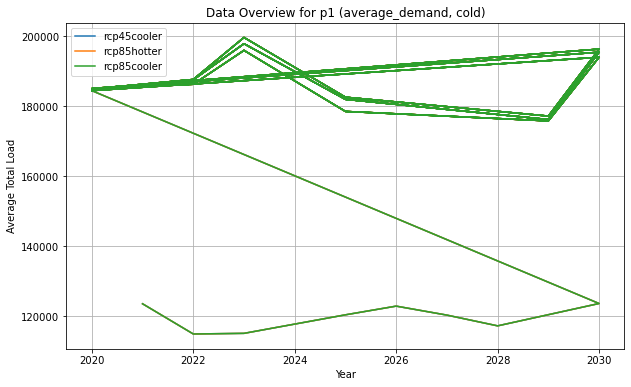

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import os


def update_line_graph(graph_value, start_year, end_year, weather, heat_or_cold):
    scenarios = ['rcp45cooler', 'rcp85hotter', 'rcp85cooler']
    # Get the current directory where your script is running
    current_directory = os.getcwd()

    # Construct the path to your data folder dynamically
    data_path = os.path.join(current_directory, 'web_page_data')

    plt.figure(figsize=(10, 6))  # Set the figure size for the plot

    for scenario_value in scenarios:
        # Construct the file path based on the scenario and weather type
        if weather == 'Num_of_days':
            if heat_or_cold == 'Heat':
                file_path = os.path.join(data_path, f'all_max_outliers_summary_{scenario_value}.csv')
            else:
                file_path = os.path.join(data_path, f'all_min_outliers_summary_{scenario_value}.csv')
        else:  # For the average demand case
            if heat_or_cold == 'Heat':
                file_path = os.path.join(data_path, f'all_max_outliers_demand_summary_{scenario_value}.csv')
            else:
                file_path = os.path.join(data_path, f'all_min_outliers_demand_summary_{scenario_value}.csv')
        
        df = pd.read_csv(file_path)
        df['region'] = df['region'].str.lower()
        graph_value = graph_value.lower()
        df = df[df['region'] == graph_value]
        
        mask = (df['Year'] >= start_year) & (df['Year'] <= end_year)
        filtered_df = df.loc[mask]
        
        if not filtered_df.empty:
            x_data = filtered_df['Year'].values 
            y_data = filtered_df['number_of_days'].values if weather == 'Num_of_days' else filtered_df['average_total_load'].values
            
            plt.plot(x_data, y_data, label=scenario_value)  # Plot the line for the current scenario
        else:
            print(f"No data for scenario {scenario_value} after filtering by {graph_value} from {start_year} to {end_year}")
    
    plt.title(f"Data Overview for {graph_value} ({weather}, {heat_or_cold})")
    plt.xlabel('Year')
    plt.ylabel('Number of Days' if weather == 'Num_of_days' else 'Average Total Load')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
update_line_graph('p1', 2020, 2030, 'average_demand', 'cold')
